# DBSCAN

In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
df = pd.read_csv('df_processed.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Month,DayofWeek,Is_Weekend,Season,PM2.5_to_PM10_Ratio
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,Moderate,1,3,0,Winter,0.50763
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,Moderate,1,4,0,Winter,0.50763
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,Moderate,1,5,1,Winter,0.50763
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,Moderate,1,6,1,Winter,0.50763
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,Moderate,1,0,0,Winter,0.50763


In [22]:
# Select the features for clustering
features = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene']
X = df[features]
X.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene
0,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02
1,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50
2,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40
3,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14
4,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89


In [23]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [25]:
from sklearn.cluster import DBSCAN

In [27]:
dbscan = DBSCAN(eps=2.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

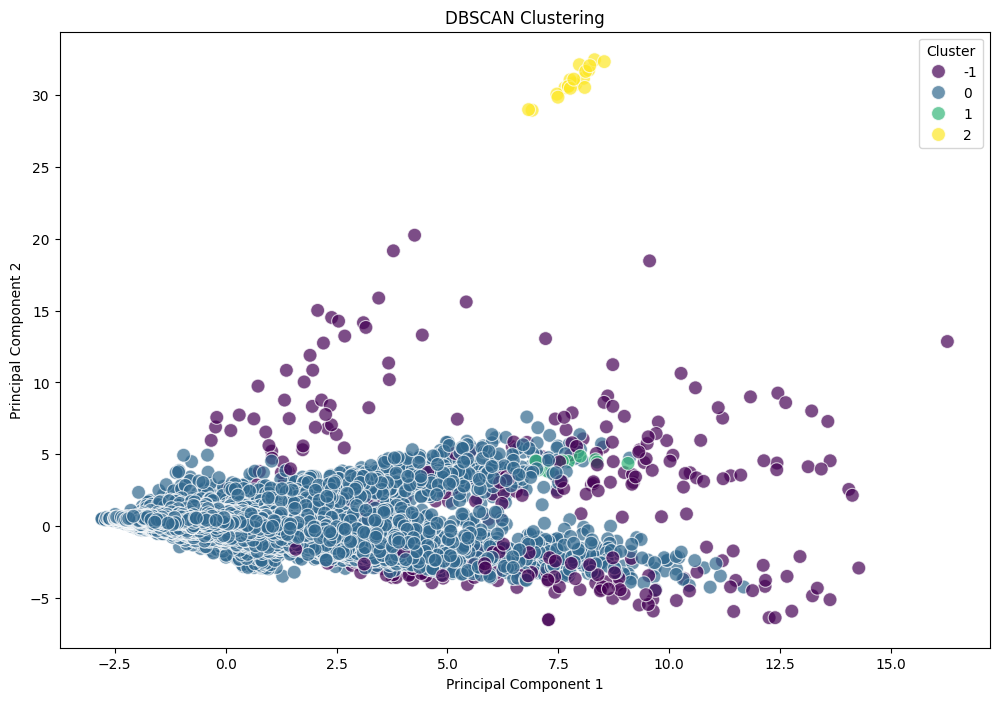

In [28]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='viridis', s=100, alpha=0.7)
plt.title('DBSCAN Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [29]:
df['Cluster'] = dbscan.fit_predict(X_scaled)
cluster_analysis = df.groupby('Cluster')[features].mean()

print("DBSCAN: Mean Pollutant Values for Each Cluster")
print(cluster_analysis)

DBSCAN: Mean Pollutant Values for Each Cluster
              PM2.5        PM10         NO        NO2         NOx        NH3  \
Cluster                                                                        
-1       174.856149  191.077573  79.001359  85.549450  103.494110  31.113786   
 0        63.355618  108.844377  15.970724  27.113538   30.302359  20.718665   
 1        99.220000  104.727778  90.047778  86.617778   79.871111  15.850000   
 2        30.301500   43.566000   0.872000   2.683000    1.147500   2.759500   

                CO        SO2         O3     Benzene     Toluene  
Cluster                                                           
-1       26.486084  45.589061  44.510744   32.750291   42.366246  
 0        1.870520  13.484357  33.870150    2.248333    6.468934  
 1       90.047778  68.068889  50.334444    3.830000   29.460000  
 2        0.264000   4.588000  45.113500  433.252500  433.087500  


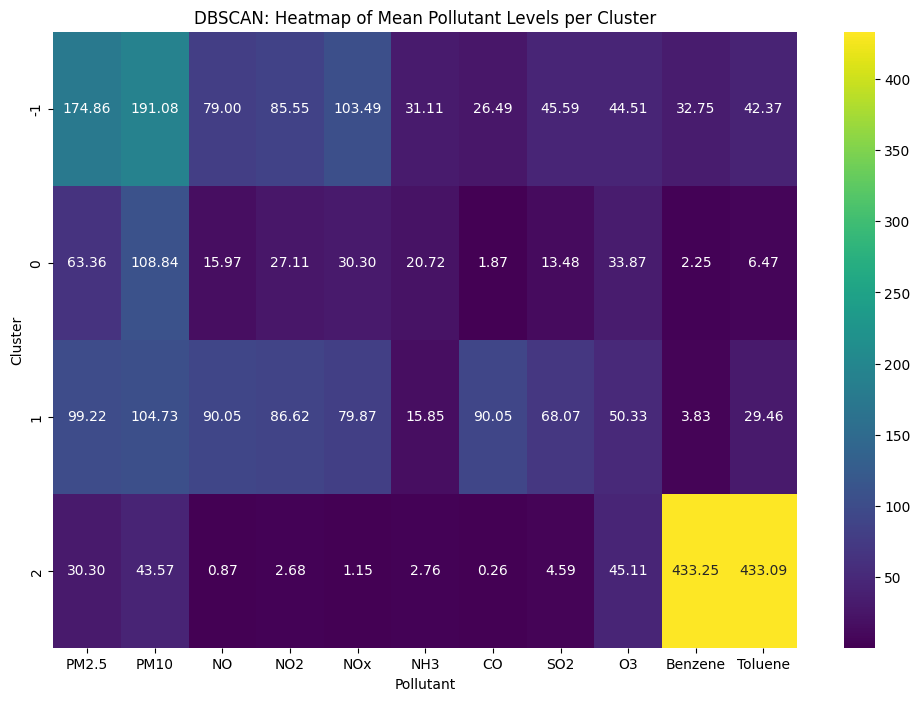

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_analysis, annot=True, cmap='viridis', fmt='.2f')
plt.title('DBSCAN: Heatmap of Mean Pollutant Levels per Cluster')
plt.ylabel('Cluster')
plt.xlabel('Pollutant')
plt.show()

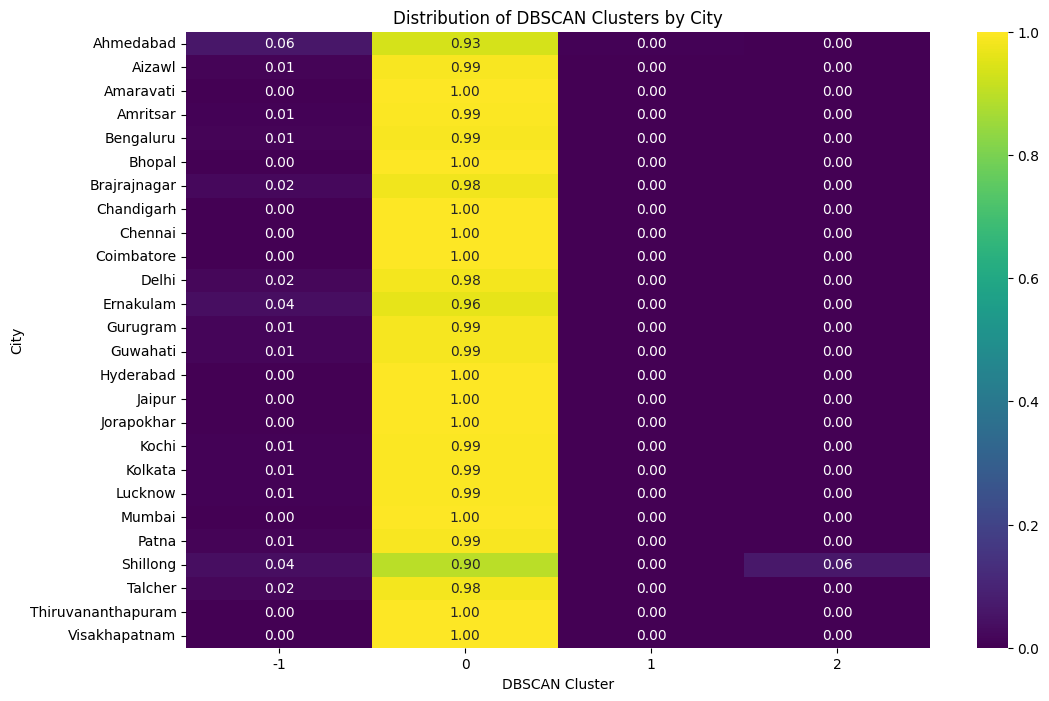

In [ ]:
city_cluster_distribution_dbscan = df.groupby('City')['Cluster'].value_counts(normalize=True).unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(city_cluster_distribution_dbscan, annot=True, cmap='viridis', fmt='.2f') # Use fmt='.2f' for percentages
plt.title('Distribution of DBSCAN Clusters by City')
plt.ylabel('City')
plt.xlabel('DBSCAN Cluster')
plt.show()